# Strategie S gegen alle anderen Strategien

Das Programm erzeugt für eine vorgebebene Stategie $S$ die Gewinnwahrscheinlichkeiten $\mathbb{P}_A(S,T)$ und $\mathbb{P}_B(S,T)$ gegen jede alternative Strategie $T$. Die
Abbildung zeigt die in absteigender Reihenfolge notierten Gewinnwahrscheinlichkeiten.  Die Länge der weißen Kästchen entspricht der jeweiligen Wahrscheinlichkeit $\mathbb{P}_B(S,T)$.

Mit dem Programm können z. B. die Gewinnwahrscheinlichkeiten beim Spiel *Würfel trifft* mit $n=6$ Chips untersucht werden. Hier ist die Proportionalstrategie $S=(3,2,1)$ optimal, obwohl die zugehörige Spieldauer beim Solitärspiel nur den zweitkleinsten Erwartungswert besitzt. 

**Eingabe (hier die Änderungen eintragen):**
- $p=[1/2,1/3,1/6]$
- $\text{strategy_S}=[4,2,0]$

Die Anzahl an Fächern sowie die zugehörigen Wahrscheinlichkeiten können verändert werden. Übrigens: Bei 6 Feldern und 18 Chips - wie beim Spiel *Differenz-trifft* - sind es 33649 Strategien. 

Vergleichsstrategie: S=[4, 2, 0]


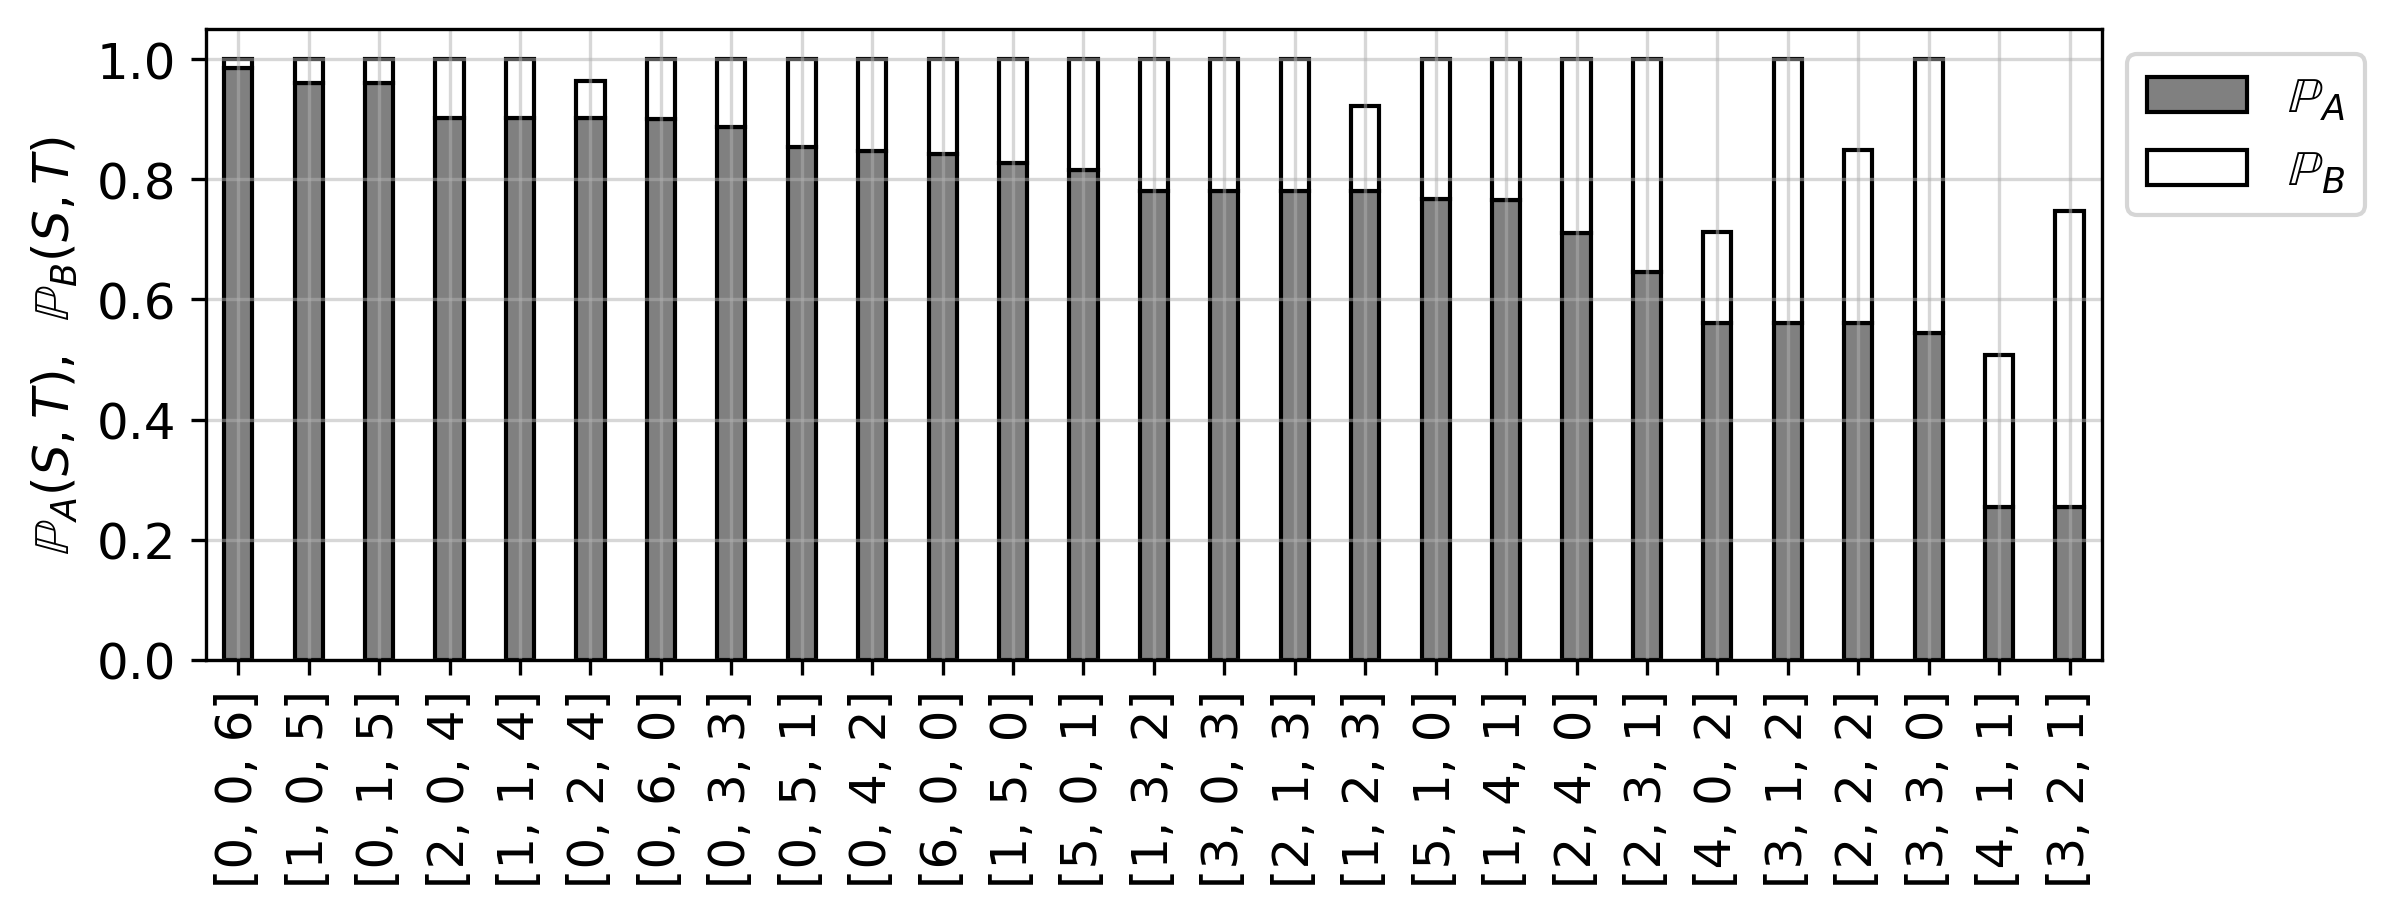

In [12]:
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt

# Eingabe
p=[1/2,1/3,1/6]
strategy_S=[4,2,0]

# Funktion zur Berechnung der Wahrscheinlichkeiten
def P(V, W, p, player='A'):
    state = (tuple(V), tuple(W), player)
    if state in memo:
        return memo[state]

    if all(v == 0 for v in V) and any(w > 0 for w in W):
        result = 1 if player == 'A' else 0  # A gewinnt
    elif all(w == 0 for w in W) and any(v > 0 for v in V):
        result = 1 if player == 'B' else 0  # B gewinnt
    elif all(v == w for v, w in zip(V, W)):
        result = 0  # Unentschieden
    else:
        total_prob = sum(p[j] for j in range(len(V)) if V[j] >= 1 or W[j] >= 1)
        result = 0
        for j in range(len(V)):
            if V[j] >= 1 and W[j] >= 1:
                V_new, W_new = list(V), list(W)
                V_new[j] -= 1
                W_new[j] -= 1
                result += p[j] / total_prob * P(V_new, W_new, p, player)
            elif W[j] >= 1 and V[j] == 0:
                W_new = list(W)
                W_new[j] -= 1
                result += p[j] / total_prob * P(V, W_new, p, player)
            elif V[j] >= 1 and W[j] == 0:
                V_new = list(V)
                V_new[j] -= 1
                result += p[j] / total_prob * P(V_new, W, p, player)

    memo[state] = result
    return result

def calculate_probabilities(U, V, p):
    P_A_win = P(U, V, p, 'A')
    P_B_win = P(U, V, p, 'B')
    P_draw = 1 - P_A_win - P_B_win
    return P_A_win, P_B_win, P_draw

def generate_strategies(total_chips, num_fields):
    for c in combinations_with_replacement(range(num_fields), total_chips):
        strategy = [0] * num_fields
        for i in c:
            strategy[i] += 1
        yield strategy

def fitness(strategy, strategy_S, p):
    global memo
    memo = {}
    P_A, P_B, P_U = calculate_probabilities(strategy_S, strategy, p)
    return P_A, P_B, P_U

def display_sorted_strategies():
    total_chips = 6
    num_fields = 3

    # Generiere alle Strategien
    strategies = list(generate_strategies(total_chips, num_fields))

    # Berechne Gewinnwahrscheinlichkeiten
    fitness_values = [(strategy, *fitness(strategy, strategy_S, p)) for strategy in strategies]

    # Entferne die beste Strategie aus der Liste
    fitness_values = [(strategy, P_A, P_B, P_U) for strategy, P_A, P_B, P_U in fitness_values if strategy != strategy_S]


    fitness_values.sort(key=lambda x: x[1],reverse=True)

    # Visualisierung vorbereiten
    strategies_labels = [str(strategy) for strategy, _, _, _ in fitness_values]
    win_prob_A = [win_prob_A for _, win_prob_A, _, _ in fitness_values]
    win_prob_B = [win_prob_B for _, _, win_prob_B, _ in fitness_values]

    plt.figure(figsize=(8, 3))

    # Balken plotten
    plt.bar(strategies_labels, win_prob_A, width=0.4, color='gray',
            edgecolor='black', label='$\mathbb{P}_A$')
    plt.bar(strategies_labels, win_prob_B, bottom=win_prob_A, width=0.4,
            color='white', edgecolor='black', label='$\mathbb{P}_B$')

    # Achsenbeschriftungen
    plt.ylabel('$\mathbb{P}_A(S,T)$,  $\mathbb{P}_B(S,T)$', fontsize=12)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)

    # Layout-Anpassungen
    plt.margins(x=0.01)
    plt.subplots_adjust(left=0.05, right=0.95)

    # Legende kompakt halten
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout(pad=0.5)
    plt.grid(alpha=0.5)

    # Speichern mit angepassten Rändern
    plt.savefig("strategie_plot.png", dpi=300, bbox_inches='tight')  # Speichert das Bild
    plt.close()  # Schließt die Plot-Ausgabe, damit Jupyter Book nicht hängen bleibt

    # Markdown-Code einfügen, um das Bild in die HTML-Seite zu laden
    from IPython.display import display, Image
    display(Image("strategie_plot.png"))

print(f"Vergleichsstrategie: S={strategy_S}")
display_sorted_strategies()